# Large Combined Oracle Bandits

Analyze the performance of various algorithms to solve the joint matching + activity task, when the number of volunteers is large and structured

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import json 
import argparse 
import sys
import time 

In [3]:
from rmab.simulator import RMABSimulator
from rmab.omniscient_policies import *
from rmab.mcts_policies import mcts_policy, mcts_mcts_policy, mcts_whittle_policy, full_mcts_policy
from rmab.fr_dynamics import get_all_transitions
from rmab.utils import get_save_path, delete_duplicate_results

/usr0/home/naveenr/miniconda3/envs/food/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
is_jupyter = 'ipykernel' in sys.modules

In [37]:
if is_jupyter: 
    seed        = 42
    n_arms      = 2
    volunteers_per_arm = 2
    budget      = 3
    discount    = 0.9
    alpha       = 3 
    n_episodes  = 300 # TODO: Change this back to 30
    episode_len = 20 # TODO: Change this back to 20
    n_epochs    = 1 # TODO: Change this back to 10
    save_with_date = False 
    TIME_PER_RUN = 0.01 * 1000
    save_name = 'combined_{}_{}_{}'.format(n_arms,volunteers_per_arm,seed)
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--n_arms',         '-N', help='num beneficiaries (arms)', type=int, default=3)
    parser.add_argument('--volunteers_per_arm',         '-V', help='volunteers per arm', type=int, default=2)
    parser.add_argument('--episode_len',    '-H', help='episode length', type=int, default=20)
    parser.add_argument('--n_episodes',     '-T', help='num episodes', type=int, default=30)
    parser.add_argument('--budget',         '-B', help='budget', type=int, default=3)
    parser.add_argument('--n_epochs',       '-E', help='number of epochs (num_repeats)', type=int, default=10)
    parser.add_argument('--discount',       '-d', help='discount factor', type=float, default=0.9)
    parser.add_argument('--alpha',          '-a', help='alpha: for conf radius', type=float, default=3)
    parser.add_argument('--seed',           '-s', help='random seed', type=int, default=42)
    parser.add_argument('--save_name',      '-n', help='save name', type=str, default='combined_lamb')
    parser.add_argument('--time_per_run',      '-t', help='time per MCTS run', type=float, default=.01*1000)
    parser.add_argument('--use_date', action='store_true')

    args = parser.parse_args()

    n_arms      = args.n_arms
    volunteers_per_arm = args.volunteers_per_arm
    budget      = args.budget
    discount    = args.discount
    alpha       = args.alpha 
    seed        = args.seed
    n_episodes  = args.n_episodes
    episode_len = args.episode_len
    n_epochs    = args.n_epochs
    save_name   = args.save_name 
    save_with_date = args.use_date 
    TIME_PER_RUN = args.time_per_run



In [38]:
# seed        = 42
# n_arms      = 10
# volunteers_per_arm = 1
# budget      = 10
# discount    = 0.9
# alpha       = 3 
# n_episodes  = 1
# episode_len = 10
# n_epochs    = 1
# save_with_date = False 
# TIME_PER_RUN = 0.01 * 1000
# save_name = 'combined_{}_{}_{}'.format(n_arms,volunteers_per_arm,seed)


In [39]:
n_states = 2
n_actions = 2

In [40]:
all_population_size = 100 # number of random arms to generate
all_transitions = get_all_transitions(all_population_size)

In [41]:
# all_transitions = np.zeros((100,2,2,2))
# epsilon = 0
# all_transitions[:,1,1,0] = 1-epsilon 
# all_transitions[:,1,1,1] = epsilon 
# all_transitions[:,1,0,1] = 1-epsilon 
# all_transitions[:,1,0,0] = epsilon 
# all_transitions[:,0,0,0] = 1-epsilon 
# all_transitions[:,0,0,1] = epsilon 
# all_transitions[:,0,1,0] = 1-epsilon 
# all_transitions[:,0,1,1] = epsilon 

In [42]:
random.seed(seed)
np.random.seed(seed)

In [43]:
all_features = np.arange(all_population_size)
match_probabilities = [random.random() for i in range(all_population_size * volunteers_per_arm)] #[random.random() for i in range(all_population_size * volunteers_per_arm)]

In [44]:
# all_features = np.arange(all_population_size)
# match_probabilities = [1.0 for i in range(all_population_size * volunteers_per_arm)] #[random.random() for i in range(all_population_size * volunteers_per_arm)]

In [45]:
np.random.seed(seed)
random.seed(seed)
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, volunteers_per_arm, episode_len, n_epochs, n_episodes, budget, discount,number_states=n_states, reward_style='match',match_probability_list=match_probabilities,TIME_PER_RUN=TIME_PER_RUN)

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [83 53]


In [46]:
lamb = 4/(n_arms*volunteers_per_arm)

## Index Policies

In [55]:
if is_jupyter:
    policy = greedy_policy
    greedy_reward, greedy_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_greedy = simulator.time_taken
    print(np.mean(greedy_reward) + lamb*n_arms*volunteers_per_arm*greedy_active_rate)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [56]:
if is_jupyter:
    policy = random_policy
    random_reward, random_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_random = simulator.time_taken
    print(np.mean(random_reward) + random_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [57]:
if is_jupyter:
    policy = whittle_activity_policy
    whittle_reward, whittle_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_whittle = simulator.time_taken    
    print(np.mean(whittle_reward) + whittle_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [58]:
if is_jupyter:
    policy = whittle_policy
    whittle_reward, whittle_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_whittle = simulator.time_taken    
    print(np.mean(whittle_reward) + whittle_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [59]:
if is_jupyter:
    policy = whittle_whittle_policy
    whittle_whittle_reward, whittle_whittle_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_whittle = simulator.time_taken    
    print(np.mean(whittle_whittle_reward) + whittle_whittle_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [60]:
if is_jupyter:
    policy = greedy_one_step_policy
    greedy_one_step_reward, greedy_one_step_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_greedy_one_step = simulator.time_taken
    print(np.mean(greedy_one_step_reward) + greedy_one_step_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [61]:
if is_jupyter:
    policy = shapley_whittle_policy 
    whittle_shapley_reward, whittle_shapley_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_whittle_shapley = simulator.time_taken
    print(np.mean(whittle_shapley_reward) + whittle_shapley_active_rate*lamb*n_arms*volunteers_per_arm)
    

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [62]:
if is_jupyter:
    policy = whittle_iterative 
    iterative_reward, iterative_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_iterative = simulator.time_taken
    print(np.mean(iterative_reward) + iterative_active_rate*lamb*n_arms*volunteers_per_arm)
    

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16


/usr0/home/naveenr/projects/food_rescue_rmab/rmab/omniscient_policies.py:468: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = (real_current_val - previous_val)/(match_probabilities[i]*state[i])


instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
instance 0, ep 57
instance 0, ep 58
instance 0, ep 59
instance 0, ep 60
instance 0, ep 61
instance 0, ep 62
instance 0, ep 63
instance 0, ep 64
instance 0, ep 65
instance 0, ep 66
instance 0, ep 67
instance 0, ep 68
instance 0, ep 69
instance 0, ep 70
instance 0, ep 71
instance 0

In [63]:
if is_jupyter:
    policy = whittle_greedy_policy 
    whittle_greedy_reward, whittle_greedy_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_whitte_greedy = simulator.time_taken
    print(np.mean(whittle_greedy_reward) + whittle_greedy_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

## MCTS Policies

In [102]:
if is_jupyter:
    policy = full_mcts_policy 
    full_mcts_reward, full_mcts_active_rate,memory = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb,get_memory=True)
    time_mcts = simulator.time_taken
    print(np.mean(full_mcts_reward) + full_mcts_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

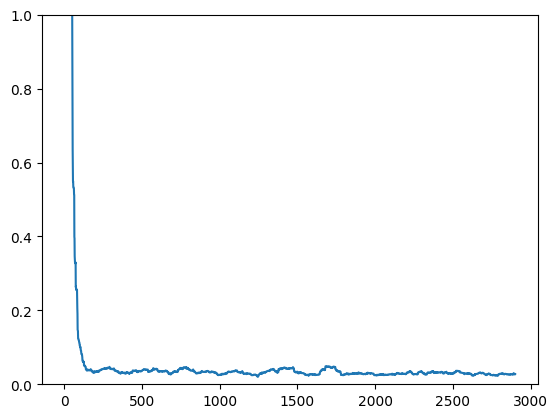

In [108]:
policy_losses = memory[-5]
value_losses = memory[-9]
plt.ylim([0,1])
plt.plot([np.mean(value_losses[i:i+100]) for i in range(len(value_losses)-100)])

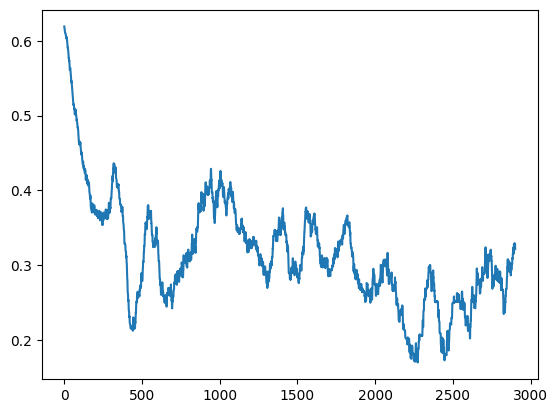

In [107]:
plt.plot([np.mean(policy_losses[i:i+100]) for i in range(len(policy_losses)-100)])

In [198]:
if is_jupyter:
    policy = mcts_policy 
    mcts_reward, mcts_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_mcts = simulator.time_taken
    print(np.mean(mcts_reward) + mcts_active_rate*lamb*n_arms*volunteers_per_arm)

instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 0, ep 30
instance 0, ep 31
instance 0, ep 32
instance 0, ep 33
instance 0, ep 34
instance 0, ep 35
instance 0, ep 36
instance 0, ep 37
instance 0, ep 38
instance 0, ep 39
instance 0, ep 40
instance 0, ep 41
instance 0, ep 42
instance 0, ep 43
instance 0, ep 44
instance 0, ep 45
instance 0, ep 46
instance 0, ep 47
instance 0, ep 48
instance 0, ep 49
instance 0, ep 50
instance 0, ep 51
instance 0, ep 52
instance 0, ep 53
instance 0, ep 54
instance 0, ep 55
instance 0, ep 56
i

In [ ]:
if is_jupyter:
    policy = mcts_mcts_policy
    mcts_mcts_reward, mcts_mcts_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_mcts_mcts = simulator.time_taken
    print(np.mean(mcts_mcts_reward) + mcts_mcts_active_rate*lamb*n_arms*volunteers_per_arm)

Took 1.835921287536621 time
0.1


In [ ]:
if is_jupyter:
    policy = mcts_whittle_policy
    mcts_whittle_reward, mcts_whittle_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
    time_mcts_whittle = simulator.time_taken
    print(np.mean(mcts_whittle_reward) + mcts_whittle_active_rate*lamb*n_arms*volunteers_per_arm)

Took 0.3013951778411865 time
0.1


In [ ]:
if is_jupyter and "time" in save_name:
    results = {}
    results['parameters'] = {'seed'      : seed,
            'n_arms'    : n_arms,
            'volunteers_per_arm': volunteers_per_arm, 
            'budget'    : budget,
            'discount'  : discount, 
            'alpha'     : alpha, 
            'n_episodes': n_episodes, 
            'episode_len': episode_len, 
            'n_epochs'  : n_epochs, 
            'lamb': lamb,
            'time_per_run': TIME_PER_RUN} 

    results['greedy_time'] = time_greedy
    results['greedy_score'] = np.mean(greedy_reward) + lamb*n_arms*volunteers_per_arm*greedy_active_rate
    results['whittle_time'] = time_whittle 
    results['whittle_score'] = np.mean(whittle_reward) + lamb*n_arms*volunteers_per_arm*whittle_active_rate
    results['greedy_one_step_time'] = time_greedy_one_step
    results['greedy_one_step_score'] = np.mean(greedy_one_step_reward) + lamb*n_arms*volunteers_per_arm*greedy_one_step_active_rate
    results['shapley_whittle_time'] = time_whittle_shapley
    results['shapley_whittle_score'] = np.mean(whittle_shapley_reward) + lamb*n_arms*volunteers_per_arm*whittle_shapley_active_rate
    results['whittle_greedy_time'] = time_whitte_greedy
    results['whittle_greedy_score'] = np.mean(whittle_greedy_reward) + lamb*n_arms*volunteers_per_arm*whittle_greedy_active_rate
    results['mcts_time'] = time_mcts 
    results['mcts_score'] = np.mean(mcts_reward) + lamb*n_arms*volunteers_per_arm*mcts_active_rate
    results['mcts_mcts_time'] = time_mcts_mcts 
    results['mcts_mcts_score'] = np.mean(mcts_mcts_reward) + lamb*n_arms*volunteers_per_arm*mcts_mcts_active_rate
    results['mcts_whittle_time'] = time_mcts_whittle
    results['mcts_whittle_score'] = np.mean(mcts_whittle_reward) + lamb*n_arms*volunteers_per_arm*mcts_whittle_active_rate
    save_path = get_save_path('combined_large',save_name,seed,use_date=save_with_date)
    json.dump(results,open('../results/'+save_path,'w'))

## Optimal Policy

In [98]:
if is_jupyter and n_arms*volunteers_per_arm <= 6:
    policy = q_iteration_policy
    per_epoch_function = q_iteration_epoch
    q_reward, q_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb,per_epoch_function=per_epoch_function)
    print(np.mean(q_reward) + q_active_rate*lamb*n_arms*volunteers_per_arm)

33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
instance 0, ep 1
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
instance 0, ep 2
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.41409491064824
33.414094910

In [ ]:
if is_jupyter and n_arms*volunteers_per_arm <= 6:
    policy = index_computation_policy
    per_epoch_function = q_iteration_epoch
    q_reward, q_active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb,per_epoch_function=per_epoch_function)
    print(np.mean(q_reward) + q_active_rate*lamb*n_arms*volunteers_per_arm)

For 0 indices are [0.03885746 0.79581738 0.04502773 0.23936749]
For 1 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 2 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 3 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 4 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 0 indices are [0.03885746 0.79581738 0.04502773 0.23936749]
For 1 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 2 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 3 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 4 indices are [0.02610683 0.79581738 0.02617359 0.23936749]
For 0 indices are [0.04803181 0.17034054 0.12326717 0.58337688]
For 1 indices are [0.03468037 0.1382494  0.07119656 0.58337688]
For 2 indices are [0.03468037 0.1382494  0.07119656 0.58337688]
For 3 indices are [0.03468037 0.1382494  0.07119656 0.58337688]
For 4 indices are [0.03468037 0.1382494  0.07119656 0.58337688]
For 0 indices are [0.03885746 0.79581738

KeyboardInterrupt: 

## Actual Experiments

In [ ]:
if "two_step" in save_name:
    lamb_list = [1,16,64]
else:
    lamb_list = [0,0.25,0.5,1,2,4,8,16,32,64] 
lamb_list = [i/(n_arms*volunteers_per_arm) for i in lamb_list]

In [ ]:
if "combined" in save_name:
    policies = [random_policy,greedy_policy,greedy_one_step_policy,whittle_policy,whittle_whittle_policy,whittle_activity_policy,shapley_whittle_policy,whittle_greedy_policy]
    policy_names = ["random","greedy","greedy_one_step","whittle","whittle_whittle","whittle_activity","shapley_whittle","whittle_greedy"]
elif "mcts" in save_name:
    policies = [mcts_policy,mcts_mcts_policy]
    policy_names = ["mcts","mcts_mcts"]
elif "two_step" in save_name:
    policies = [whittle_greedy_policy,mcts_policy,mcts_mcts_policy,mcts_whittle_policy]
    policy_names = ["whittle_greedy","mcts","mcts_mcts","mcts_whittle"]

In [ ]:
results = {}
results['parameters'] = {'seed'      : seed,
        'n_arms'    : n_arms,
        'volunteers_per_arm': volunteers_per_arm, 
        'budget'    : budget,
        'discount'  : discount, 
        'alpha'     : alpha, 
        'n_episodes': n_episodes, 
        'episode_len': episode_len, 
        'n_epochs'  : n_epochs, 
        'lambda_list': lamb_list,
        'time_per_run': TIME_PER_RUN} 

In [ ]:
if (n_arms * volunteers_per_arm) <= 6:
    print("Running optimal")
    policy = q_iteration_policy
    per_epoch_function = q_iteration_epoch
    
    match_reward_list = []
    active_rate_list = []

    for lamb in lamb_list:
        reward, active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb,per_epoch_function=per_epoch_function)
        match_reward_list.append(np.mean(reward))
        active_rate_list.append(active_rate)

    results['optimal_match'] = match_reward_list 
    results['optimal_active'] = active_rate_list     

Running optimal
instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 1, ep 1
instance 1, ep 2
instance 1, ep 3
instance 1, ep 4
instance 1, ep 5
instance 1, ep 6
instance 1, ep 7
instance 1, ep 8
instance 1, ep 9
instance 1, ep 10
instance 1, ep 11
instance 1, ep 12
instance 1, ep 13
instance 1, ep 14
instance 1, ep 15
instance 1, ep 16
instance 1, ep 17
instance 1, ep 18
instance 1, ep 19
instance 1, ep 20
instance 1, ep 21
instance 1, ep 22
instance 1, ep 23
instance 1, ep 24
instance 1, ep 25
instance 1, ep 26
instance 1, 

In [ ]:
for policy,name in zip(policies,policy_names):
    match_reward_list = []
    active_rate_list = []

    print("On policy {}".format(name))

    for lamb in lamb_list:
        reward, active_rate = run_heterogenous_policy(simulator, n_episodes, n_epochs, discount,policy,seed,lamb=lamb)
        match_reward_list.append(np.mean(reward))
        active_rate_list.append(active_rate)

    results['{}_match'.format(name)] = match_reward_list 
    results['{}_active'.format(name)] = active_rate_list 

On policy random
instance 0, ep 1
instance 0, ep 2
instance 0, ep 3
instance 0, ep 4
instance 0, ep 5
instance 0, ep 6
instance 0, ep 7
instance 0, ep 8
instance 0, ep 9
instance 0, ep 10
instance 0, ep 11
instance 0, ep 12
instance 0, ep 13
instance 0, ep 14
instance 0, ep 15
instance 0, ep 16
instance 0, ep 17
instance 0, ep 18
instance 0, ep 19
instance 0, ep 20
instance 0, ep 21
instance 0, ep 22
instance 0, ep 23
instance 0, ep 24
instance 0, ep 25
instance 0, ep 26
instance 0, ep 27
instance 0, ep 28
instance 0, ep 29
instance 1, ep 1
instance 1, ep 2
instance 1, ep 3
instance 1, ep 4
instance 1, ep 5
instance 1, ep 6
instance 1, ep 7
instance 1, ep 8
instance 1, ep 9
instance 1, ep 10
instance 1, ep 11
instance 1, ep 12
instance 1, ep 13
instance 1, ep 14
instance 1, ep 15
instance 1, ep 16
instance 1, ep 17
instance 1, ep 18
instance 1, ep 19
instance 1, ep 20
instance 1, ep 21
instance 1, ep 22
instance 1, ep 23
instance 1, ep 24
instance 1, ep 25
instance 1, ep 26
instance 1,

In [ ]:
save_path = get_save_path('combined_large',save_name,seed,use_date=save_with_date)

In [ ]:
delete_duplicate_results('combined_large',save_name,results)

In [ ]:
json.dump(results,open('../results/'+save_path,'w'))